In [2]:
from typing import TypedDict
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display
import random

In [3]:
class AgentState(TypedDict):
    name: str
    values: list[int]
    counter: int
    message: str

In [26]:
def greete_node(state: AgentState) -> AgentState:
    """Node to set a greeting message in the agent state"""
    state["message"] = f"Hi {state.get('name' ,'')}, How are you doing ?"
    state["counter"] = 0
    state["values"] = []
    return state

def random_node(state: AgentState) -> AgentState:
    """Node to add random values to agent state"""

    state["values"].append(random.randint(0, 5))
    state["counter"] += 1

    return state

def loop_edge(state: AgentState) -> AgentState:
    """Condition edge to perform the loop operation over 5 times"""

    if state.get("counter", 0) < 5: return "loop"
    
    return "end"

In [27]:
graph = StateGraph(AgentState)

graph.add_node("greete_node", greete_node)
graph.add_node("random_node", random_node)

graph.add_edge("greete_node", "random_node")

graph.add_conditional_edges(
    "random_node",
    loop_edge,
    {
        "loop": "random_node",
        "end": END
    }
)

graph.set_entry_point("greete_node")

app = graph.compile()

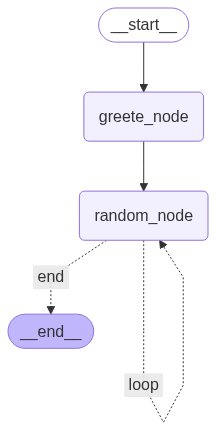

In [28]:
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
result = app.invoke({ 'name': "DJ"})
print(result)

{'name': 'DJ', 'values': [5, 2, 3, 2, 1], 'counter': 5, 'message': 'Hi DJ, How are you doing ?'}
